In [1]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import data
mnist = data.load_mnist_data()

In [3]:
x_all = mnist['data'].astype(np.float32) / 255
y_all = mnist['target'].astype(np.int32)
x_train, x_test = np.split(x_all, [60000])
y_train, y_test = np.split(y_all, [60000])

x_train.shape

(60000, 784)

In [4]:
class MLP(Chain):
    def __init__(self):
        super(MLP, self).__init__(
            l1=L.Linear(784, 100),
            l2=L.Linear(100, 100),
            l3=L.Linear(100, 10),
        )

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        y = self.l3(h2)
        return y

In [5]:
model = L.Classifier(MLP())
optimizer = optimizers.SGD()
optimizer.setup(model)

In [6]:
pprint(x_train.shape)
pprint(y_train.shape)

(60000, 784)
(60000,)


In [7]:
batchsize = 100
epochsize = 25
mmax = len(x_train)
mlist = range(2, int(mmax), int(mmax / 10))
tr_losses = []
cv_losses = []
for m in mlist:
    #if m % 200 == 0:
    print('m = %d' % m)
    
    xx = x_train[0:m]
    yy = y_train[0:m]
    datasize = len(xx)
    
    model = L.Classifier(MLP())
    optimizer = optimizers.Adam()
    optimizer.setup(model)
    
    # training
    for epoch in range(epochsize):
        indexes = np.random.permutation(datasize)
        for i in range(0, datasize, batchsize):
            x = Variable(xx[indexes[i : i + batchsize]])
            t = Variable(yy[indexes[i : i + batchsize]])
            optimizer.update(model, x, t)
            
    # train losses
    sum_loss = 0
    for i in range(0, len(xx), batchsize):
        x = Variable(xx[i : i + batchsize])
        t = Variable(yy[i : i + batchsize])
        loss = model(x, t)
        sum_loss += loss.data * len(x.data)
    tr_losses.append(sum_loss / len(xx))
            
    # cross validation losses
    sum_loss = 0
    for i in range(0, len(x_test), batchsize):
        x = Variable(x_test[i : i + batchsize])
        t = Variable(y_test[i : i + batchsize])
        loss = model(x, t)
        sum_loss += loss.data * len(x.data)
    cv_losses.append(sum_loss / len(x_test))

m = 2
m = 6002
m = 12002
m = 18002
m = 24002
m = 30002
m = 36002
m = 42002
m = 48002
m = 54002


In [ ]:
batchsize = 100
datasize = len(x_train)
epoches = range(10)

tr_losses = []
cv_losses = []

model = L.Classifier(MLP())
optimizer = optimizers.Adam()
optimizer.setup(model)

# training
for epoch in epoches:
    if epoch % 2 == 0:
        print("epoch: %d" % epoch)
    indexes = np.random.permutation(datasize)
    for i in range(0, datasize, batchsize):
        x = Variable(x_train[indexes[i : i + batchsize]])
        t = Variable(y_train[indexes[i : i + batchsize]])
        optimizer.update(model, x, t)
            
    # train losses
    sum_loss = 0
    for i in range(0, datasize, batchsize):
        x = Variable(x_train[indexes[i : i + batchsize]])
        t = Variable(y_train[indexes[i : i + batchsize]])
        loss = model(x, t)
        sum_loss += loss.data * len(x.data)
    tr_losses.append(sum_loss / len(x_train))
            
    # cross validation losses
    sum_loss = 0
    for i in range(0, len(x_test), batchsize):
        x = Variable(x_test[i : i + batchsize])
        t = Variable(y_test[i : i + batchsize])
        loss = model(x, t)
        sum_loss += loss.data * len(x.data)
    cv_losses.append(sum_loss / len(x_test))

epoch: 0
epoch: 2
epoch: 4
epoch: 6


ValueError: x and y must have same first dimension

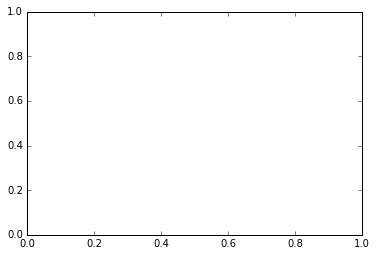

In [11]:
plt.plot(epoches, tr_losses, label = 'train')
plt.plot(epoches, cv_losses, label = 'cv')
plt.legend()
#plt.ylim(0, 0.6)

(0, 0.6)

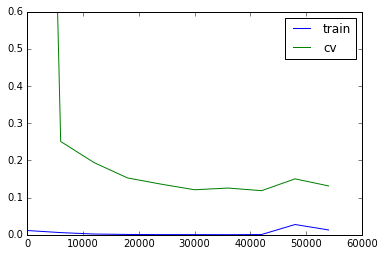

In [8]:
plt.plot(mlist, tr_losses, label = 'train')
plt.plot(mlist, cv_losses, label = 'cv')
plt.legend()
plt.ylim(0, 0.6)